In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
#Transformación para series temporales donde cogemos el año como índice del dataframe
financialDF = pd.read_csv('Datos/ds_target_cat.csv', header=0, index_col=1, parse_dates=True)
financialDF.head()

,CODE,VQ_MARKET_CAP,CSR__ROE,VR__EV_TO_EBIT,CSR__ROC_JOEL_GREENBLATT,CSR__OPERATING_MARGIN,VQ__PIOTROSKI_F_SCORE,VR__PS_RATIO,VR__PB_RATIO,VQ__ALTMAN_Z_SCORE,...,CSR__NET_MARGIN_RANKING,IS__REVENUE_RANKING,IS__NET_INCOME_RANKING,IS__COST_OF_GOODS_SOLD_RANKING,BS__TOTAL_EQUITY_RANKING,IS__EBITDA_RANKING,BS__TOTAL_ASSETS_RANKING,BS__LONG_TERM_DEBT_RANKING,BS__TOTAL_CURRENT_LIABILITIES_RANKING,TARGET_RANKING
YEAR,,,,,,,,,,,,,,,,,,,,,
2012-01-01,ETE,12732.3534,27.89,19.82,11.46,8.02,5,0.73,6.03,0.74,...,2787,371,933,255,260,276,302,64,320,714
2007-01-01,ETE,8191.2308,2122.84,25.13,14.74,11.92,5,1.16,0.00,1.52,...,1419,315,417,219,444,319,354,109,374,1385
2015-01-01,ETE,14384.6808,0.00,28.67,5.90,7.28,7,0.41,0.00,0.81,...,3365,176,407,108,194,209,276,36,449,1756
2014-01-01,ETE,31002.7009,72.22,28.98,8.00,5.10,7,0.56,46.73,1.44,...,3936,123,725,69,211,230,306,53,347,5349
2010-01-01,ETE,8712.4952,317.83,24.53,9.21,15.92,5,1.33,72.37,1.05,...,2391,631,1021,471,508,499,529,146,821,1060


In [3]:
financialDF.shape

(87438, 52)

In [4]:
 len(financialDF['INDUSTRY01'].unique())

70

In [5]:
 len(financialDF['INDUSTRY02'].unique())

149

In [6]:
financialDF['INDUSTRY01'].unique()

array([nan, 'Coal', 'Metals & Mining', 'Semiconductors', 'Steel',
       'Communication Services', 'Travel & Leisure', 'Tobacco Products',
       'Airlines', 'Transportation & Logistics', 'Chemicals', 'Autos',
       'Publishing', 'Restaurants', 'Computer Hardware',
       'Retail - Apparel & Specialty', 'Health Care Providers',
       'Biotechnology', 'Consumer Packaged Goods', 'Conglomerates',
       'Oil & Gas - E&P', 'REITs', 'Banks', 'Retail - Defensive',
       'Brokers & Exchanges', 'Credit Services', 'Medical Devices',
       'Asset Management', 'Insurance - Life', 'Waste Management',
       'Entertainment', 'Business Services', 'Health Care Plans',
       'Industrial Products', 'Personal Services', 'Building Materials',
       'Advertising & Marketing Services', 'Oil & Gas - Drilling',
       'Aerospace & Defense', 'Agriculture', 'Beverages - Alcoholic',
       'Oil & Gas - Midstream', 'Truck Manufacturing',
       'Medical Distribution', 'Oil & Gas - Integrated',
       'Real

Voy a agrupar los sectores en una jerarquía superior: Basic Materials, Consumer Cyclical, Financial Services, Real Estate, Consumer Defensive, Healthcare, Utilities, Communication Services, Energy, Industrials, Technology

In [7]:
list_basic_materials = ['Agriculture','Building Materials','Chemicals','Coal','Forest Products',
                        'Metals & Mining','Steel']
financialDF.loc[financialDF['INDUSTRY01'].isin(list_basic_materials), 'INDUSTRY01'] = 'Basic Materials'

In [8]:
list_consumer_cyclical = ['Advertising & Marketing Services','Autos','Entertainment',
                          'Homebuilding & Construction','Manufacturing - Apparel & Furniture',
                          'Packaging & Containers','Personal Services','Publishing','Restaurants',
                          'Retail - Apparel & Specialty','Travel & Leisure']
financialDF.loc[financialDF['INDUSTRY01'].isin(list_consumer_cyclical), 'INDUSTRY01'] = 'Consumer Cyclical'

In [9]:
list_financial_services = ['Asset Management','Banks','Brokers & Exchanges','Credit Services','Insurance',
                           'Insurance - Life','Insurance - Property & Casualty','Insurance - Specialty']
financialDF.loc[financialDF['INDUSTRY01'].isin(list_financial_services), 'INDUSTRY01'] = 'Financial Services'

In [10]:
list_real_state = ['Real Estate Services','REITs']
financialDF.loc[financialDF['INDUSTRY01'].isin(list_real_state), 'INDUSTRY01'] = 'Real Estate'

In [11]:
list_consumer_defensive = ['Beverages - Alcoholic','Beverages - Non-Alcoholic','Consumer Packaged Goods',
                           'Education','Retail - Defensive','Tobacco Products']
financialDF.loc[financialDF['INDUSTRY01'].isin(list_consumer_defensive), 'INDUSTRY01'] = 'Consumer Defensive'

In [12]:
list_healthcare = ['Biotechnology','Drug Manufacturers','Health Care Plans','Health Care Providers',
                   'Medical Devices','Medical Diagnostics & Research','Medical Distribution',
                   'Medical Instruments & Equipment']
financialDF.loc[financialDF['INDUSTRY01'].isin(list_healthcare), 'INDUSTRY01'] = 'Healthcare'

In [13]:
list_utilities = ['Utilities - Independent Power Producers','Utilities - Regulated']
financialDF.loc[financialDF['INDUSTRY01'].isin(list_utilities), 'INDUSTRY01'] = 'Utilities'

In [14]:
list_energy = ['Oil & Gas - Drilling','Oil & Gas - E&P','Oil & Gas - Integrated','Oil & Gas - Midstream',
               'Oil & Gas - Refining & Marketing','Oil & Gas - Services']
financialDF.loc[financialDF['INDUSTRY01'].isin(list_energy), 'INDUSTRY01'] = 'Energy'

In [15]:
list_industrials = ['Aerospace & Defense','Airlines','Business Services','Conglomerates','Consulting & Outsourcing',
                    'Employment Services','Engineering & Construction','Farm & Construction Machinery',
                    'Industrial Distribution','Industrial Products','Transportation & Logistics','Truck Manufacturing',
                    'Waste Management']
financialDF.loc[financialDF['INDUSTRY01'].isin(list_industrials), 'INDUSTRY01'] = 'Industrials'

In [16]:
list_technology = ['Application Software','Communication Equipment','Computer Hardware','Online Media','Semiconductors']
financialDF.loc[financialDF['INDUSTRY01'].isin(list_technology), 'INDUSTRY01'] = 'Technology'

In [17]:
financialDF['INDUSTRY01'].unique()

array([nan, 'Basic Materials', 'Technology', 'Communication Services',
       'Consumer Cyclical', 'Consumer Defensive', 'Industrials',
       'Healthcare', 'Energy', 'Real Estate', 'Financial Services',
       'Utilities'], dtype=object)

### Limpieza y preprocesado de los datos

Voy a quedarme con las columnas que me interesan

In [18]:
financialDF.columns

Index(['CODE', 'VQ_MARKET_CAP', 'CSR__ROE', 'VR__EV_TO_EBIT',
       'CSR__ROC_JOEL_GREENBLATT', 'CSR__OPERATING_MARGIN',
       'VQ__PIOTROSKI_F_SCORE', 'VR__PS_RATIO', 'VR__PB_RATIO',
       'VQ__ALTMAN_Z_SCORE', 'CSR__ROA', 'PSDA__EARNINGS_PER_SHARE_DILUTED',
       'CSR__ROIC', 'CSR__GROSS_MARGIN', 'VQ__YOY_EPS_GROWTH',
       'VQ__YOY_EBITDA_GROWTH', 'PSDA__EBITDA_PER_SHARE',
       'PSDA__TOTAL_DEBT_PER_SHARE', 'CSR__NET_MARGIN', 'IS__REVENUE',
       'IS__NET_INCOME', 'IS__COST_OF_GOODS_SOLD', 'BS__TOTAL_EQUITY',
       'IS__EBITDA', 'BS__TOTAL_ASSETS', 'BS__LONG_TERM_DEBT',
       'BS__TOTAL_CURRENT_LIABILITIES', 'PRICE_START', 'PRICE_END', 'RETURNS',
       'RISK', 'INDUSTRY01', 'INDUSTRY02', 'TARGET', 'RETURNS_CAT',
       'TARGET_CAT', 'VR__EV_TO_EBIT_RANKING',
       'CSR__ROC_JOEL_GREENBLATT_RANKING', 'RETURNS_RANKING',
       'PSDA__EARNINGS_PER_SHARE_DILUTED_RANKING',
       'PSDA__EBITDA_PER_SHARE_RANKING', 'PSDA__TOTAL_DEBT_PER_SHARE_RANKING',
       'CSR__NET_MARGIN_R

In [19]:
columns_to_drop = ['INDUSTRY02', 'TARGET', 'RETURNS_CAT','TARGET_CAT', 'VR__EV_TO_EBIT_RANKING',
                   'CSR__ROC_JOEL_GREENBLATT_RANKING', 'RETURNS_RANKING','PSDA__EARNINGS_PER_SHARE_DILUTED_RANKING',
                   'PSDA__EBITDA_PER_SHARE_RANKING', 'PSDA__TOTAL_DEBT_PER_SHARE_RANKING','CSR__NET_MARGIN_RANKING', 
                   'IS__REVENUE_RANKING', 'IS__NET_INCOME_RANKING', 'IS__COST_OF_GOODS_SOLD_RANKING',
                   'BS__TOTAL_EQUITY_RANKING', 'IS__EBITDA_RANKING','BS__TOTAL_ASSETS_RANKING', 'BS__LONG_TERM_DEBT_RANKING',
                   'BS__TOTAL_CURRENT_LIABILITIES_RANKING', 'TARGET_RANKING']
financialDF = financialDF.drop(columns_to_drop, axis=1) 

In [20]:
financialDFByIndustry = financialDF.groupby(['INDUSTRY01'])
financialDFByIndustry = financialDFByIndustry.apply(lambda x: x.sort_index())
lista_codigos = financialDFByIndustry['CODE'].unique()
NUM_EMPRESAS = len(lista_codigos)
financialDFByIndustry.head()

CODE  VQ_MARKET_CAP  CSR__ROE  VR__EV_TO_EBIT  \
INDUSTRY01      YEAR                                                        
Basic Materials 1979-01-01  BOTX            0.0      0.00             0.0   
                1980-01-01  BOTX            0.0      0.00             0.0   
                1981-01-01  BOTX            0.0      0.00             0.0   
                1982-01-01  BOTX            0.0     77.78             0.0   
                1983-01-01  BOTX            0.0     30.59             0.0   

                            CSR__ROC_JOEL_GREENBLATT  CSR__OPERATING_MARGIN  \
INDUSTRY01      YEAR                                                          
Basic Materials 1979-01-01                      0.00                  100.0   
                1980-01-01                      0.00                  100.0   
                1981-01-01                      0.00                  100.0   
                1982-01-01                   2876.19                  100.0   
                1983-01-01                   1007.27                  100.0   

                            VQ__PIOTROSKI_F_SCORE  VR__PS_RATIO  VR__PB_RATIO  \
INDUSTRY01      YEAR                                                            
Basic Materials 1979-01-01                      0           0.0           0.0   
                1980-01-01                      0           0.0           0.0   
                1981-01-01                      0           0.0           0.0   
                1982-01-01                      0           0.0           0.0   
                1983-01-01                      0           0.0           0.0   

                            VQ__ALTMAN_Z_SCORE       ...         \
INDUSTRY01      YEAR                                 ...          
Basic Materials 1979-01-01                 0.0       ...          
                1980-01-01                 0.0       ...          
                1981-01-01                 0.0       ...          
                1982-01-01                 0.0       ...          
                1983-01-01                 0.0       ...          

                            BS__TOTAL_EQUITY  IS__EBITDA  BS__TOTAL_ASSETS  \
INDUSTRY01      YEAR                                                         
Basic Materials 1979-01-01               0.0        21.7               0.0   
                1980-01-01               0.0        24.1               0.0   
                1981-01-01               0.0        25.0               0.0   
                1982-01-01               3.6        30.2              11.5   
                1983-01-01               4.9        27.7              12.0   

                            BS__LONG_TERM_DEBT  BS__TOTAL_CURRENT_LIABILITIES  \
INDUSTRY01      YEAR                                                            
Basic Materials 1979-01-01                 1.6                            0.0   
                1980-01-01                 1.5                            0.0   
                1981-01-01                 1.4                            0.0   
                1982-01-01                 1.5                            5.9   
                1983-01-01                 1.3                            5.3   

                            PRICE_START  PRICE_END   RETURNS      RISK  \
INDUSTRY01      YEAR                                                     
Basic Materials 1979-01-01         1.78       3.00  0.685393  0.435154   
                1980-01-01         3.16       4.53  0.433544  1.338696   
                1981-01-01         4.97       1.44 -0.710262  1.132193   
                1982-01-01         1.84       5.78  2.141304  1.343029   
                1983-01-01         5.78       4.53 -0.216263  0.425273   

                                 INDUSTRY01  
INDUSTRY01      YEAR                         
Basic Materials 1979-01-01  Basic Materials  
                1980-01-01  Basic Materials  
                1981-01-01  Basic Materials  
                1982-01-01  Basi

In [21]:
financialDFByIndustry.shape

(87280, 32)

Calculo el porcentaje de filas que tienen valores NaN en el dataset

In [22]:
round(((financialDFByIndustry.isna().sum()/financialDFByIndustry.shape[0])*100),2)

CODE                                 0.00
VQ_MARKET_CAP                        0.15
CSR__ROE                             1.34
VR__EV_TO_EBIT                       7.40
CSR__ROC_JOEL_GREENBLATT            13.35
CSR__OPERATING_MARGIN                4.10
VQ__PIOTROSKI_F_SCORE                0.00
VR__PS_RATIO                         4.52
VR__PB_RATIO                         1.58
VQ__ALTMAN_Z_SCORE                   0.00
CSR__ROA                             0.01
PSDA__EARNINGS_PER_SHARE_DILUTED     0.00
CSR__ROIC                            1.98
CSR__GROSS_MARGIN                   16.71
VQ__YOY_EPS_GROWTH                   0.28
VQ__YOY_EBITDA_GROWTH                9.48
PSDA__EBITDA_PER_SHARE               0.15
PSDA__TOTAL_DEBT_PER_SHARE           0.15
CSR__NET_MARGIN                      4.10
IS__REVENUE                          0.00
IS__NET_INCOME                       0.00
IS__COST_OF_GOODS_SOLD              12.61
BS__TOTAL_EQUITY                     0.00
IS__EBITDA                        

Voy a mirar qué empresas las que vienen con valores a NaN para descartarlas y quedarme solo con aquellas que tienen 
todos los valores

In [23]:
%%time
lista_companyas = []
for c in lista_codigos:
    dataCompanya = financialDFByIndustry[financialDFByIndustry['CODE']==c]
    arrayNaNCompanya = ((dataCompanya.isna().sum()/dataCompanya.shape[0])*100).values    
    numNaN = arrayNaNCompanya.sum()
    if numNaN == 0:
        lista_companyas.append(c)
NUM_EMPRESAS = len(lista_companyas)
print('Número de compañías en el estudio: ', NUM_EMPRESAS)

Número de compañías en el estudio:  6271
CPU times: user 1min 25s, sys: 4 ms, total: 1min 25s
Wall time: 1min 25s


En una primera aproximación, me voy a quedar solo con aquellas empresas que no tienen valores NaN en ninguna de sus filas, asumiendo que la calidad del dato para estos casos es mayor. Queda pendiente una revisión de los datos de las compañías descartadas para intentar aumentar el universo de datos.

De las empresas restantes, nos quedamos con las que tienen datos de los últimos 10 años (al menos) y no tienen saltos en las series temporales.

In [24]:
%%time
lista_companyas_def = []
for c in lista_companyas:        
    df = (financialDFByIndustry[financialDFByIndustry['CODE']==c])
    if len(df.index.values) > 11:
        anyo_min = df.index.values[0]
        anyo_max = df.index.values[-1]
        num_valores = ((anyo_max[1] - anyo_min[1])/365).days
        if (num_valores + 1) == len(df.index.values): #Tengo series temporales sin saltos
            #me quedo con la ultima fila
            df = (financialDFByIndustry[financialDFByIndustry['CODE']==c]).iloc[-1:]
            t = df.index.values[0][1]
            if t.year == 2017:            
                lista_companyas_def.append(c)
NUM_EMPRESAS = len(lista_companyas_def)
print('Número de compañías en el estudio: ', NUM_EMPRESAS)   

Número de compañías en el estudio:  1315
CPU times: user 1min 22s, sys: 16 ms, total: 1min 22s
Wall time: 1min 22s


In [25]:
#Me quedo con las filas correspondientes a las 1318 compañías
financialDFByIndustry = financialDFByIndustry[financialDFByIndustry['CODE'].isin(lista_companyas_def)]
lista_codigos = financialDFByIndustry['CODE'].unique()
financialDFByIndustry.shape

(28705, 32)

A parte de los valores missing, vamos a observar aquellas filas que tengan cero en alguna columna y a proceder a su tratamiento

In [26]:
columns = financialDFByIndustry.columns
columns = columns.drop(['CODE'])
#Estudio de las columnas con ceros
for col in columns:
    filas = financialDFByIndustry.shape[0]
    filas_nozero = len((financialDFByIndustry.loc[:,col]).nonzero()[0])
    zeros = filas - filas_nozero
    print(col, 'con', str(round((zeros/filas)*100,2)), '% de ceros')


VQ_MARKET_CAP con 1.13 % de ceros
CSR__ROE con 7.26 % de ceros
VR__EV_TO_EBIT con 1.15 % de ceros
CSR__ROC_JOEL_GREENBLATT con 3.6 % de ceros
CSR__OPERATING_MARGIN con 4.31 % de ceros
VQ__PIOTROSKI_F_SCORE con 7.61 % de ceros
VR__PS_RATIO con 4.58 % de ceros
VR__PB_RATIO con 8.72 % de ceros
VQ__ALTMAN_Z_SCORE con 3.39 % de ceros
CSR__ROA con 1.14 % de ceros
PSDA__EARNINGS_PER_SHARE_DILUTED con 0.99 % de ceros
CSR__ROIC con 8.39 % de ceros
CSR__GROSS_MARGIN con 12.89 % de ceros
VQ__YOY_EPS_GROWTH con 4.04 % de ceros
VQ__YOY_EBITDA_GROWTH con 2.55 % de ceros
PSDA__EBITDA_PER_SHARE con 0.75 % de ceros
PSDA__TOTAL_DEBT_PER_SHARE con 18.72 % de ceros
CSR__NET_MARGIN con 4.04 % de ceros
IS__REVENUE con 3.91 % de ceros
IS__NET_INCOME con 0.14 % de ceros
IS__COST_OF_GOODS_SOLD con 12.5 % de ceros
BS__TOTAL_EQUITY con 0.92 % de ceros
IS__EBITDA con 0.36 % de ceros
BS__TOTAL_ASSETS con 1.11 % de ceros
BS__LONG_TERM_DEBT con 27.36 % de ceros
BS__TOTAL_CURRENT_LIABILITIES con 2.85 % de ceros
PRICE

Para el caso concreto de los valores a cero en PRICE_END, observamos que son dos compañías que tienen esos datos a cero, yendo a Yahoo Financials podemos deducir que se trata de un redondeo en los decimales y que en estos casos RETURNS tiene un valor muy próximo a -1, que es el valor que marca la columna. Por lo tanto no hacemos nada al respecto. Lo que sí que haremos es quitar las columnas PRICE_START y PRICE_END del dataset, ya que la información relacionada con estas dos columnas queda recogida por la columna RETURNS.

In [27]:
financialDFByIndustry[(financialDFByIndustry.PRICE_END == 0)].loc[:,['CODE','PRICE_START', 'PRICE_END', 'RETURNS']]

,,CODE,PRICE_START,PRICE_END,RETURNS
INDUSTRY01,YEAR,,,,
Basic Materials,2015-01-01,MACQF,0.03,0.0,-1.0
Technology,2008-01-01,SPYR,0.01,0.0,-1.0


In [28]:
financialDFByIndustry = financialDFByIndustry.drop(['PRICE_START', 'PRICE_END'], axis=1) 
financialDFByIndustry.head()

CODE  VQ_MARKET_CAP  CSR__ROE  VR__EV_TO_EBIT  \
INDUSTRY01      YEAR                                                        
Basic Materials 1988-01-01  TORM        27.3780     26.32            8.05   
                1988-01-01   SCL       135.2028     21.15            7.31   
                1988-01-01   OLN       635.7549     14.17            7.20   
                1988-01-01   VMC      1669.2810     22.55            7.90   
                1988-01-01    WY      5116.4550     14.56            7.23   

                            CSR__ROC_JOEL_GREENBLATT  CSR__OPERATING_MARGIN  \
INDUSTRY01      YEAR                                                          
Basic Materials 1988-01-01                     46.63                  24.20   
                1988-01-01                     24.55                   7.51   
                1988-01-01                     23.56                   7.80   
                1988-01-01                     38.76                  19.79   
                1988-01-01                     31.70                  12.93   

                            VQ__PIOTROSKI_F_SCORE  VR__PS_RATIO  VR__PB_RATIO  \
INDUSTRY01      YEAR                                                            
Basic Materials 1988-01-01                      0          1.49          2.19   
                1988-01-01                      0          0.41          2.02   
                1988-01-01                      0          0.29          0.93   
                1988-01-01                      0          1.58          2.63   
                1988-01-01                      0          0.51          1.27   

                            VQ__ALTMAN_Z_SCORE       ...         \
INDUSTRY01      YEAR                                 ...          
Basic Materials 1988-01-01                5.82       ...          
                1988-01-01                3.20       ...          
                1988-01-01                1.95       ...          
                1988-01-01                5.59       ...          
                1988-01-01                1.26       ...          

                            IS__NET_INCOME  IS__COST_OF_GOODS_SOLD  \
INDUSTRY01      YEAR                                                 
Basic Materials 1988-01-01             2.0                     9.8   
                1988-01-01            13.4                   292.6   
                1988-01-01            98.0                  1670.0   
                1988-01-01           136.0                   663.3   
                1988-01-01           564.4                  7314.4   

                            BS__TOTAL_EQUITY  IS__EBITDA  BS__TOTAL_ASSETS  \
INDUSTRY01      YEAR                                                         
Basic Materials 1988-01-01              12.5         4.1              16.9   
                1988-01-01              66.8        40.4             185.6   
                1988-01-01             683.0       291.0            1940.0   
                1988-01-01             634.3       294.3             957.6   
                1988-01-01            4040.8      1708.4           15387.2   

                            BS__LONG_TERM_DEBT  BS__TOTAL_CURRENT_LIABILITIES  \
INDUSTRY01      YEAR                                                            
Basic Materials 1988-01-01                 3.0                            1.3   
                1988-01-01                45.4                           44.2   
                1988-01-01               474.0                          617.0   
                1988-01-01                62.0                          118.0   
                1988-01-01              4198.7                          948.5   

                             RETURNS      RISK       INDUSTRY01  
INDUSTRY01      YEAR                                             
Basic Materials 1988-01-01  0.013970  0.933617  Basic Materials  
                1988-01-01  0.201566  0.357830  Basic Materials  
                1988-01-01

El caso de VQ_MARKET_CAP tampoco puede ser cero, voy a observar qué filas son las que vienen a cero para esa columna

In [29]:
lista_emp_sin_cap = (financialDFByIndustry[(financialDFByIndustry.VQ_MARKET_CAP == 0)].loc[:,['CODE','VQ_MARKET_CAP']])['CODE'].unique()
len(lista_emp_sin_cap)

147

Eliminamos también estas 147 empresas, en futuras iteraciones se puede intentar poner como capitalización el valor del año anterior.

In [30]:
financialDFByIndustry = financialDFByIndustry[~financialDFByIndustry['CODE'].isin(lista_emp_sin_cap)]
lista_codigos = financialDFByIndustry['CODE'].unique()
NUM_EMPRESAS = len(lista_codigos)
print('Número de empresas en el estudio', NUM_EMPRESAS)
financialDFByIndustry.shape

Número de empresas en el estudio 1168


(25584, 30)

Primero vamos a establecer un modelo básico (la predicción del valor en el momento t+1 es la misma que la del valor t) y a medir su rendimiento. Nos servirá como punto de partida para comparar la mejora en los siguientes algoritmos

### Persistence model

In [31]:
series = financialDFByIndustry.loc[:,'RETURNS']

In [32]:
# persistence model
def model_persistence(x):
    return x

In [33]:
def create_model(serie, split_value):
    # create lagged dataset
    values = pd.DataFrame(serie.values)
    dataframe = pd.concat([values.shift(1), values], axis=1)
    dataframe.columns = ['t', 't+1']
    # split into train and test sets
    X = dataframe.values
    limite = int(len(X)*split_value)
    if split_value == 1:
        limite = 1
    train, test = X[1:len(X)-limite], X[len(X)-limite:]    
    train_X, train_y = train[:,0], train[:,1]
    test_X, test_y = test[:,0], test[:,1]

    # walk-forward validation
    predictions = list()
    for x in test_X:
        yhat = model_persistence(x)
        predictions.append(yhat)
    rmse = sqrt(mean_squared_error(test_y, predictions))
    return test_y,predictions,rmse    

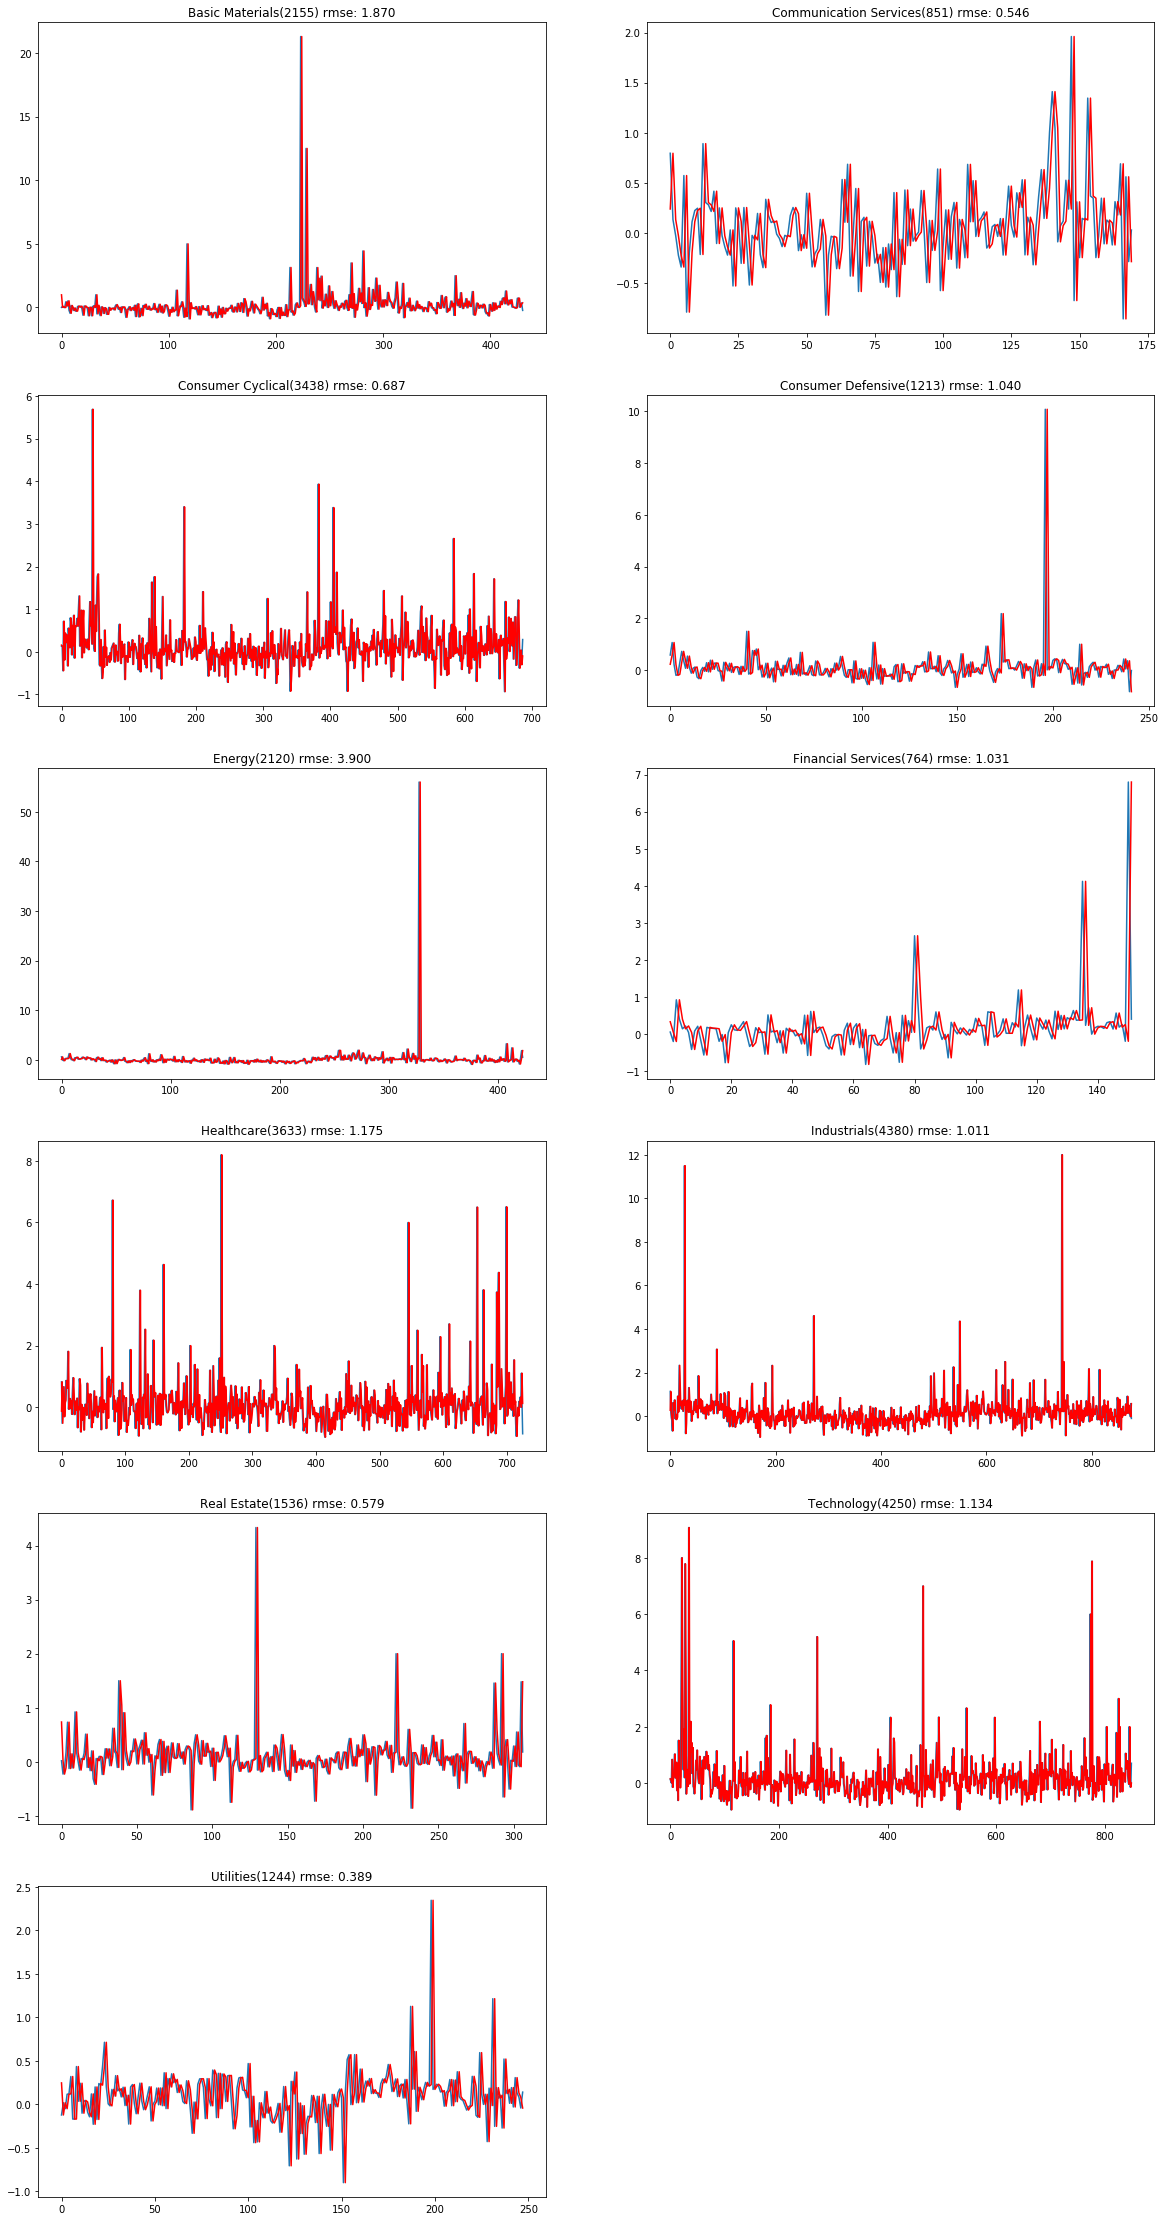

In [34]:
plt.clf()
seriePorIndustry = series.groupby(['INDUSTRY01'])
plt.figure(figsize=(20,40))
persistence_model = list()
i=1
for industria, group in seriePorIndustry:    
    plt.subplot(6, 2, i)
    i = i+1
    test_y,predictions,rmse = create_model(group, 0.2)
    strRmse = ') rmse: %.3f'%rmse
    title = industria + '(' + str(len(group)) + strRmse
    plt.title(title)
    # plot predictions vs expected
    plt.plot(test_y)
    plt.plot(predictions, color='red')
plt.show()

In [35]:
seriePorIndustria = series.groupby(['INDUSTRY01'])
#Predigo solo el último valor, es decir, para el 2017 devuelvo lo mismo que obtuve en 2016
#El rmse será el error producido entre el valor real de 2017 y el que se devolvió (valor a 2016)
#Esto me va a servir para comparar este modelo con el resto
persistence_model = list()
for industry, group in seriePorIndustria:    
    test_y,predictions,rmse = create_model(group, 1)                                                     
    persistence_model.append({'industria':industry, 'prediction':predictions, 'rmse': rmse})

### VAR (Vector Auto Regression)

Partiendo del modelo anterior, vamos a aplicar distintos algoritmos que lo mejoren. El primero de ellos será VAR.

In [36]:
industrias = financialDFByIndustry['INDUSTRY01'].unique()
industrias

array(['Basic Materials', 'Communication Services', 'Consumer Cyclical',
       'Consumer Defensive', 'Energy', 'Financial Services', 'Healthcare',
       'Industrials', 'Real Estate', 'Technology', 'Utilities'], dtype=object)

In [37]:
from statsmodels.tsa.vector_ar.var_model import VAR
import dateutil.parser

#make final predictions
var_model = list()
for i in industrias:
    dataIndustry = financialDFByIndustry.loc[i]
    data = dataIndustry[dataIndustry.index < dateutil.parser.parse("2017-01-01")] #Le quito el último anyo, para luego sacar la predicción de 2017
    data2017 = dataIndustry[dataIndustry.index == dateutil.parser.parse("2017-01-01")]
    data = data.drop(['CODE','INDUSTRY01'], axis=1)  
    model = VAR(endog=data)
    try :
        model_fit = model.fit()
        yhat = model_fit.forecast(model_fit.y, steps=data2017.shape[0])        
        #predicciones_finales.append({'codigo':c, 'prediction':yhat[0][25]})
        test_y = financialDFByIndustry.loc[i].loc[:,'RETURNS'][-(data2017.shape[0]):] #RETURNS de 2017         
        rmse = sqrt(mean_squared_error(test_y, yhat[:,26])) #La posición 26 es la de la columna RETURNS
        var_model.append({'industria':i, 'prediction':yhat[:,26], 'rmse': rmse})
    except:
        pass

/opt/ipnb3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Pintamos los resultados del persistence_model vs VAR

In [38]:
num_mejores_pred = 0
for elem_var in var_model:
    for elem_per in persistence_model:
        if elem_per['industria'] == elem_var['industria']:
            print('Industria:', elem_var['industria'], 'RMSE(1):', elem_per['rmse'], 'RMSE(2)',elem_var['rmse'])
            if elem_per['rmse']>elem_var['rmse']:
                num_mejores_pred = num_mejores_pred + 1

Industria: Basic Materials RMSE(1): 0.5920882926179803 RMSE(2) 0.4478256450383399
Industria: Communication Services RMSE(1): 0.3140363550043328 RMSE(2) 0.5424889919916408
Industria: Consumer Cyclical RMSE(1): 0.38637794885686727 RMSE(2) 0.4722682272747799
Industria: Consumer Defensive RMSE(1): 0.8173333333333332 RMSE(2) 1.3815763498487938
Industria: Energy RMSE(1): 1.333333333333334 RMSE(2) 5.696483556392703
Industria: Financial Services RMSE(1): 6.404001330167741 RMSE(2) 1.2884857041879472
Industria: Healthcare RMSE(1): 0.986995564653702 RMSE(2) 1.0820915741878876
Industria: Industrials RMSE(1): 0.6790661733076142 RMSE(2) 0.997030010105938
Industria: Real Estate RMSE(1): 1.2992499889051612 RMSE(2) 0.4152055569332411
Industria: Technology RMSE(1): 0.7066962305986694 RMSE(2) 0.91023639183434
Industria: Utilities RMSE(1): 0.18281080856024637 RMSE(2) 0.24771557092327903


In [39]:
print('El VAR ha sido mejor', num_mejores_pred, 'veces de', len(var_model))                

El VAR ha sido mejor 3 veces de 11
